In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import  GridSpec
import numpy as np
from matplotlib.lines import Line2D

%matplotlib inline

In [2]:
dfd = pd.read_csv("insar_displacements.csv",index_col='Year',parse_dates=True)
dfc = pd.read_csv("Nome_climate_data.csv",index_col='Date',parse_dates=True)


In [3]:
# cumsum = pd.DataFrame(index=dfc.index,columns=['sum'])
for i,yr in enumerate(['2017','2018','2019']):
    dfc.loc[yr,'Precip cumsum in'] = dfc.loc[yr,'Precipitation (Inches)'].cumsum()
    dfc.loc[yr, 'Precip cumsum mm'] = dfc.loc[yr,'Precip cumsum in'] * 25.4
    dfc.loc[yr,'Mean rolling F'] = dfc.loc[yr,'Mean Temp (F)'].rolling(5).mean()
    dfc.loc[yr,'Mean rolling C'] = (dfc.loc[yr,'Mean rolling F'] - 32) * (5/9)
    #dfc.loc[yr,'Departure, mean rolling'] = dfc.loc[yr,'Mean Temp (F)'] - dfc.loc[yr,'Mean Temp (F)'].rolling(5).mean()
    


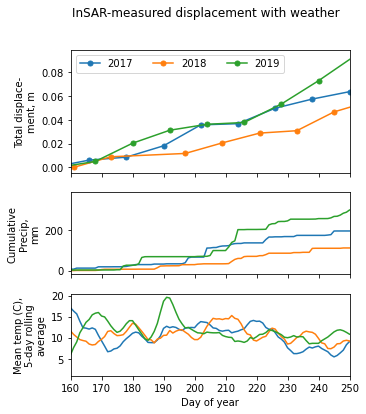

In [6]:
fig, ax = plt.subplots(3,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios':[1.5,1,1]})
#fig, ax = plt.subplots(3,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios':[1.5,1,1,1,1]})
#for i,yr in enumerate(['2017','2018','2019']):
#    dfc[yr].plot(ax=ax[3],x='doy',y='Departure, mean rolling',legend=False)
for i,yr in enumerate(['2017','2018','2019']):
    dfc[yr].plot(ax=ax[2],x='doy',y='Mean rolling C',legend=False)
for i,yr in enumerate(['2017','2018','2019']):
    dfc[yr].plot(ax=ax[1],x='doy',y='Precip cumsum mm',legend=False)
for i,yr in enumerate(['2017','2018','2019']):
    dfd[yr].plot(ax=ax[0],x='doy',y='W',marker=".",markersize="10",label=yr)
#for i,yr in enumerate(['2017','2018','2019']):
#    dfc[yr].plot(ax=ax[4],x='doy',y='Precipitation (Inches)',legend=False)
ax[0].set_xlim(160,250)
ax[0].set_ylabel('Total displace-\nment, m')
ax[0].legend(loc='upper left',ncol=3)
ax[1].set_ylabel('Cumulative\nPrecip,\nmm')
ax[2].set_ylabel('Mean temp (C),\n5-day rolling\naverage')
ax[2].set_xlabel('Day of year')
#ax[3].set_ylabel('Departure,\nmean rolling')
#ax[4].set_ylabel('Daily pRecip,\ninches')
#ax[3].set_ylim(5,12);
fig.suptitle('InSAR-measured displacement with weather')
fig.savefig('InSAR.svg', dpi=200)
fig.savefig('InSAR.png', dpi=200)